# Colored Geometric Brownian Motion

Multivariate, colored Geometric Brownian motion $X_i(t)$ is the solution to the multiplicative noise stochastic differential equations

$$dX_i = \mu_i X_i dt + \sigma_i Z_i X_i dt $$

and
$$\tau_i d Z_i = - Z_i+dW_i.$$

One can solve this SDE to get

$$X_i(t)=X_i(0)\exp\left[\mu_i t +\sigma_i \int_0^t ds Z_i(s)\right].$$

### In the limit $\tau\rightarrow 0$

this does not yield the expected geometric Brownian Motion system. Instead, in this limit the process is governed by

$$dx_{i}=x_{i}\left[(\mu_{i}-\phi)dt+\frac{1}{2}(\sigma_{i}^{2}(1-2x_{i})-\theta)dt+(\sigma_{i}dW_{i}-\psi)\right]\\\theta=\sum_{j}x_{j}\sigma_{j}^{2}(1-2x_{j})$$


In [39]:
import matplotlib.pyplot as plt
import numpy as np
import stopro as p

## Comparison of Colored GMB with different timescales and ordinary GMB


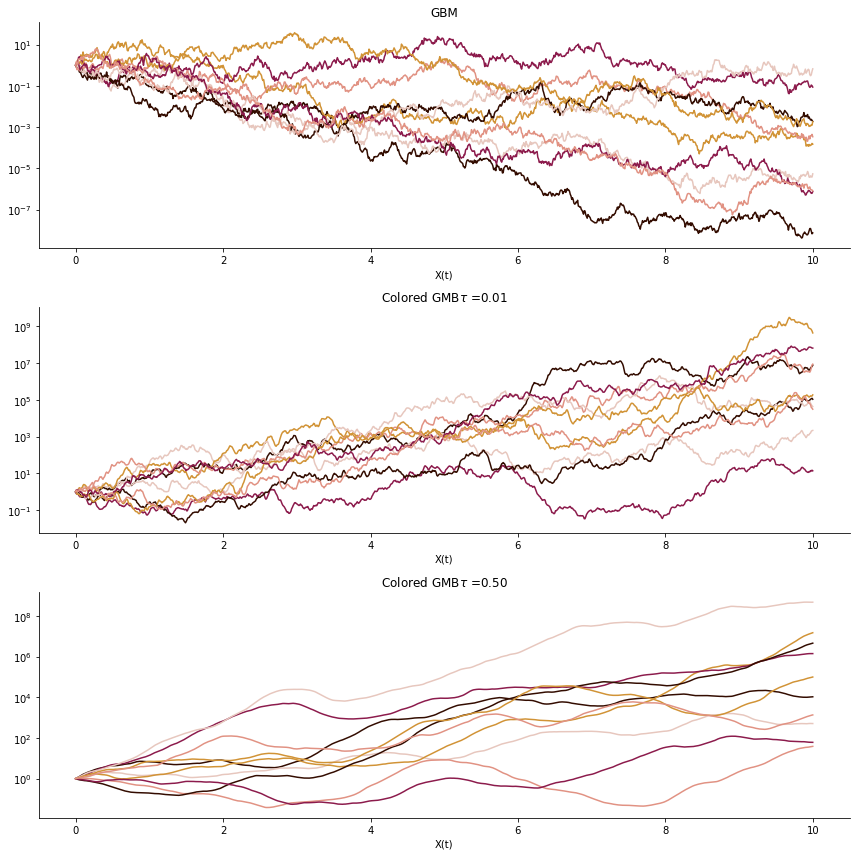

In [42]:
T = 10
dt = 0.001
gap = 10
samples = 10
mu=1
sigma=2
tau1 = 0.01
tau2 = 0.5
res=[]
tt=["GBM","Colored GMB"+r"$\tau$ ="+f'{tau1:.2f}',"Colored GMB"+r"$\tau$ ="+f'{tau2:.2f}']
res.append(p.geometric_brownian_motion(T,dt,gap=gap,samples=samples,mu=mu,sigma=sigma))
res.append(p.colored_geometric_brownian_motion(T,dt,gap=gap,samples=samples,mu=mu,sigma=sigma,tau=tau1))
res.append(p.colored_geometric_brownian_motion(T,dt,gap=gap,samples=samples,mu=mu,sigma=sigma,tau=tau2))

fig,ax = plt.subplots(len(res),1,figsize=[12,12])
for i in range(len(res)):
    for j in range(samples):
        ax[i].plot(res[i]["t"],np.squeeze(res[i]["X"][j]))
    ax[i].set_xlabel("t")
    ax[i].set_xlabel("X(t)")
    ax[i].set_yscale("log")
    ax[i].set_title(tt[i])
fig.tight_layout()
plt.show()